In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from math import *

<ipython-input-2-6805f1834d38>:10: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(0.5, q[0])


{'0 0 1': 246, '0 0 0': 257, '0 1 1': 237, '0 1 0': 260}


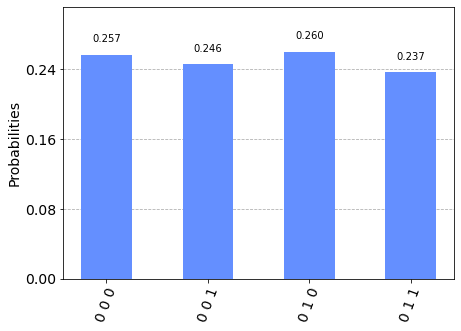

In [2]:
# 3 qubits e 3 bits classicos
q = QuantumRegister(3)
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="teleport")

# Estado inicial e u1(y) = u3(0,0,y)
#qc.u3(0.3, 0.2, 0.1, q[0])
qc.u1(0.5, q[0])

# prepara um emeranhamento entre o qubit 1 e qubit 2
qc.h(q[1])
qc.cx(q[1], q[2])

# A instrução barrier impede que as otimizações reordenem as portas em toda a linha de origem.
qc.barrier(q)

# realiza a operação CNOT entre qubit 0 e o qubit 1
qc.cx(q[0], q[1])

# realiza a operação Hadamard qubit 0 
qc.h(q[0])

# medida do qubit 0
qc.measure(q[0], c0[0])

# medida do qubit 1
qc.measure(q[1], c1[0])

# se necessario, realiza a correção de fase no qubit 2
qc.z(q[2]).c_if(c0, 1)

# se necessario, realiza um bit flip no qubit 2
qc.x(q[2]).c_if(c1, 1)

# medida do qubit 2
qc.measure(q[2], c2[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
print(counts)

plot_histogram(counts)

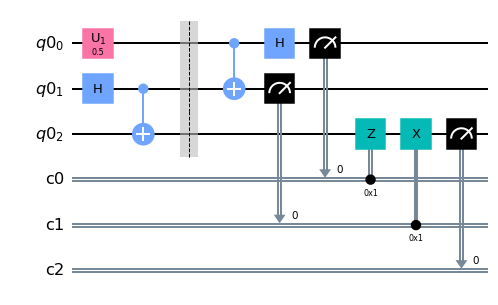

In [3]:
qc.draw(output='mpl')